# ΙΑΚΩΒΟΣ ΕΥΔΑΙΜΩΝ p3130059 ΤΜΗΜΑ: ΠΛΗΡΟΦΟΡΙΚΗΣ

# Exploring US Flights Data

In this assignment, you will investigate the [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time#) that we have already met in one of our lectures.

You will use the 2018 data available at <https://auebgr-my.sharepoint.com/:u:/g/personal/louridas_aueb_gr/EbeTzde1LddFmqNWBFWWxNcBj5tDR_zvzDHvqqcmnndeEQ?e=0pwH6j>.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [1]:
import numpy as np
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Question 1

Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.

After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.

Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience. 


## ANSWER 1 :

Διαβάζουμε το αρχείο και δημιουργούμε το dataframe με την βοήθεια του pandas.
Καθορίζουμε ώστε το πεδίο FL_DATE να φορτωθεί ως datetime τύπος δεδομένου και ώστε να διορθώσουμε τον τύπο δεδομένου αλλά και το format της ώρας στα πεδία DEP_TIME και ARR_TIME

In [2]:
filename = '515364771_T_ONTIME_REPORTING.csv'
data = pd.read_csv(filename, parse_dates=['FL_DATE'],dtype={'DEP_TIME':str,'ARR_TIME':str})
data['DEP_TIME'] = pd.to_datetime(data['DEP_TIME'],errors='coerce' ,format='%H%M').dt.time
data['ARR_TIME'] = pd.to_datetime(data['ARR_TIME'],errors='coerce' ,format='%H%M').dt.time
data.head()

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",13:02:00,-8.0,14:17:00,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",11:24:00,9.0,12:34:00,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",20:22:00,4.0,22:32:00,-50.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",13:49:00,104.0,16:13:00,94.0,0.0,NaN,0.0,79.0,0.0,0.0,0.0,15.0,NaN
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",08:46:00,1.0,12:14:00,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Εκτυπώνουμε κάποια χρήσιμες λεπτομέριες/στατιστικά για το dataframe μας

In [4]:
#in the case that DEP_DELAY field is NaN I suppose that a flight is cancelled or generally is delayed
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 20 columns):
FL_DATE                datetime64[ns]
TAIL_NUM               object
CARRIER                object
ORIGIN                 object
ORIGIN_CITY_NAME       object
DEST                   object
DEST_CITY_NAME         object
DEP_TIME               object
DEP_DELAY              float64
ARR_TIME               object
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 19            float64
dtypes: datetime64[ns](1), float64(10), object(9)
memory usage: 1.1+ GB
None
(7213446, 20)


In [5]:
data.describe()

,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
count,7.096212e+06,7.076406e+06,7.213446e+06,7.213446e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,0.0
mean,9.969858e+00,5.048581e+00,1.616204e-02,2.475793e-03,1.945501e+01,3.636459e+00,1.588547e+01,9.353890e-02,2.564412e+01,NaN
std,4.482964e+01,4.692664e+01,1.260985e-01,4.969571e-02,5.890812e+01,2.999601e+01,3.589350e+01,3.174306e+00,4.978776e+01,NaN
min,-1.220000e+02,-1.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,-5.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,-2.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,7.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.100000e+01,NaN
max,2.710000e+03,2.692000e+03,1.000000e+00,1.000000e+00,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,NaN


Αφαιρούμε την 19η στήλη την Unnamed. Αυτή η στήλη υπάρχει καθώς κάθε εγγραφή τελειώνει με κόμμα, έτσι η read_csv() συμπεριφέρεται σαν να υπάρχει μία επιπλέον, άδεια στήλη.

In [3]:
if len(data.loc[data.iloc[:,19].notna()])==0:
    data.drop(data.columns[[19]], axis=1, inplace=True)
print(data.shape)
data.head()

(7213446, 19)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",13:02:00,-8.0,14:17:00,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",11:24:00,9.0,12:34:00,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",20:22:00,4.0,22:32:00,-50.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",13:49:00,104.0,16:13:00,94.0,0.0,NaN,0.0,79.0,0.0,0.0,0.0,15.0
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",08:46:00,1.0,12:14:00,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


* Στην περίπτωση που κάποια τιμή του πεδίου DEP_DELAY είναι μεγαλύτερη του 0 σημαίνει ότι η πτήση έχει καθυστέρησει να αναχωρήσει

* Στην περίπτωση όπου το πεδίο CANCELLED είναι θετικό και μεγαλύτερο του μηδέν τότε η πτήση έχει ακυρωθεί, οπότε την θεωρούμε σαν καθυστερημένη ως προς την αναχώρησή της

* Στην περίπτωση που κάποια τιμή του DEP_DELAY είναι NaN θεωρούμε ότι και πάλι η πτήση έχει καθυστέρηση

Σύμφωνα με αυτά τα κριτήρια φιλτράρουμε μόνο τις πτήσεις με καθυστέρηση αναχώρησης και για κάθε αεροδρόμιο υπολογίζουμε την πιθανότητα καθυστέρησης αναχώρησης των πτήσεων για το αεροδρόμιο αυτό με βάση τις συνολικές αργοπορημένες αναχωρήσεις ενός αεροδρομίο ως προς το σύνολο των πτήσεων που αναχωρούν από το αεροδρόμιο αυτό. Αυτό το ποσοστό που υπολογίζουμε το αποθηκεύουμε σε μία νέα στήλη με όνομα propability_dep_delay και υπολογίζεται για κάθε εγγραφή του dataframe.

In [4]:
delayed_data=data.loc[(data.DEP_DELAY>0) | (data['CANCELLED']>0) | (data['DEP_DELAY'].isna())]
def delay_airport(group):
    x = len(delayed_data.loc[delayed_data.ORIGIN == group.iloc[0]])
    y = len(group)
    prop = x/y
    return prop
data['propability_dep_delay'] = data.groupby(['ORIGIN','ORIGIN_CITY_NAME'])['ORIGIN'].transform(lambda x: delay_airport(x))
data.head()

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,propability_dep_delay
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",13:02:00,-8.0,14:17:00,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.205603
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",11:24:00,9.0,12:34:00,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.281211
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",20:22:00,4.0,22:32:00,-50.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.285955
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",13:49:00,104.0,16:13:00,94.0,0.0,NaN,0.0,79.0,0.0,0.0,0.0,15.0,0.390618
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",08:46:00,1.0,12:14:00,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.281211


Έπειτα, αφοαιρούμε τους outliers με βάση το 1% percentile και ταξινομούμε σε φθήνουσα σειρά τα δεδομένα μας με βάση τις τιμές της νέας στήλης propability_dep_delay που εισάγαμε παραπάνω.

In [5]:
vc = data.ORIGIN.value_counts()
lowest_percentile = vc.quantile(0.01)
vc = vc[vc.values > lowest_percentile]
vc_ind = vc.index.values
t_data = data[data['ORIGIN'].isin(vc_ind)]
group_t = t_data.sort_values(['propability_dep_delay','ORIGIN','ORIGIN_CITY_NAME'],ascending=False)
group_t

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,propability_dep_delay
2349,2018-01-01,308NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",12:37:00,2.0,14:03:00,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
20593,2018-01-02,306NV,G4,OGD,"Ogden, UT",LAS,"Las Vegas, NV",11:43:00,3.0,11:58:00,-2.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
59459,2018-01-04,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",09:58:00,1.0,10:43:00,-7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
78727,2018-01-05,308NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:35:00,2.0,11:04:00,-6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
113814,2018-01-07,NaN,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",NaT,NaN,NaT,NaN,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
133231,2018-01-08,325NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:29:00,-4.0,11:17:00,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
133269,2018-01-08,336NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",13:54:00,7.0,14:51:00,11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
189546,2018-01-11,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",10:03:00,6.0,10:49:00,-1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
208985,2018-01-12,303NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:32:00,-1.0,10:54:00,-16.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667
242759,2018-01-14,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",10:02:00,5.0,10:47:00,-3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667


Μετά, υπολογίζουμε το mean και τον median για την στήλη DEP_DELAY για κάθε αεροδρόμιο αναχώρησης, έχοντας αφαιρέσει τους outliers. Ταξινομούμε σε φθήνουσα σειρά τα δεδομένα μας ως προς τον mean και αντίστοιχα ως προς τον median

In [6]:
grouped=(t_data.groupby(['ORIGIN','ORIGIN_CITY_NAME'])['DEP_DELAY'].agg([('mean_dep_delay','mean'),('median_dep_delay','median')])
         .reset_index())
sorted_mean = grouped.sort_values(by = ['mean_dep_delay','ORIGIN','ORIGIN_CITY_NAME'], ascending=False)
sorted_median = grouped.sort_values(by = ['median_dep_delay','ORIGIN','ORIGIN_CITY_NAME'], ascending=False)
print(sorted_mean)
print(sorted_median)

    ORIGIN           ORIGIN_CITY_NAME  mean_dep_delay  median_dep_delay
266    PPG              Pago Pago, TT       45.385246               0.0
157    HYA                Hyannis, MA       34.397727               3.5
223    MMH          Mammoth Lakes, CA       33.503704              -1.0
247    OTH    North Bend/Coos Bay, OR       29.173184              -2.0
249    OWB              Owensboro, KY       27.635514               3.0
145    HGR             Hagerstown, MD       26.760870               0.0
201    LWB              Lewisburg, WV       25.709220              -5.0
336    TTN                Trenton, NJ       25.308151               0.0
300    SCK               Stockton, CA       24.265857               8.0
271    PSM             Portsmouth, NH       24.225589               0.0
5      ACK              Nantucket, MA       23.306624              -3.0
73     CMX       Hancock/Houghton, MI       22.574530              -8.0
314    SLN                 Salina, KS       22.279412           

Τέλος, προσθέτουμε στα δεδομένα μας τις στήλες με τον mean και median και τα ταξινομούμε σε φθήνουσα σειρά ως προς την στήλη propability_dep_delay.

In [7]:
t_data['mean_dep_delay'] = t_data.groupby(['ORIGIN','ORIGIN_CITY_NAME'])['DEP_DELAY'].transform('mean')
t_data['median_dep_delay'] = t_data.groupby(['ORIGIN','ORIGIN_CITY_NAME'])['DEP_DELAY'].transform('median')
group_t = t_data.sort_values(['propability_dep_delay','ORIGIN','ORIGIN_CITY_NAME'],ascending=False)
group_t

C:\Users\IAKOVOS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IAKOVOS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,propability_dep_delay,mean_dep_delay,median_dep_delay
2349,2018-01-01,308NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",12:37:00,2.0,14:03:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
20593,2018-01-02,306NV,G4,OGD,"Ogden, UT",LAS,"Las Vegas, NV",11:43:00,3.0,11:58:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
59459,2018-01-04,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",09:58:00,1.0,10:43:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
78727,2018-01-05,308NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:35:00,2.0,11:04:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
113814,2018-01-07,NaN,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",NaT,NaN,NaT,...,B,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
133231,2018-01-08,325NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:29:00,-4.0,11:17:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
133269,2018-01-08,336NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",13:54:00,7.0,14:51:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
189546,2018-01-11,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",10:03:00,6.0,10:49:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
208985,2018-01-12,303NV,G4,OGD,"Ogden, UT",AZA,"Phoenix, AZ",09:32:00,-1.0,10:54:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0
242759,2018-01-14,302NV,G4,OGD,"Ogden, UT",LAX,"Los Angeles, CA",10:02:00,5.0,10:47:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.666667,19.064000,5.0


## Question 2

Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.


Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.

And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.

Note that because in the 2018 performance data airlines are only indicated by their code, you should also download the carrier lookup table from https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS, so that you can include airline names in your results.

## ANSWER 2 :

Αρχικά διαβάζουμε τα δεδομένα με τους κωδικούς των αεροσκαφών και την εταιρία που ανήκουν. Στη συνέχεια, συγχωνεύουμε το προηγούμενό μας dataframe με το νέο έτσι ώστε να δημιουργηθεί ένα νέο dataframe με τις στήλες του προηγούμενουν προσαυξημένο με τις στήλες του νέου datagrame. 

In [3]:
aircrafts_file='L_UNIQUE_CARRIERS.csv_'
aircraft_data = pd.read_csv(aircrafts_file)
aircraft_data.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [4]:
del data['propability_dep_delay']
data_merged = pd.merge(data, aircraft_data, how='left', left_on='CARRIER', right_on='Code')
data_merged.head()

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,Code,Description
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",13:02:00,-8.0,14:17:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",11:24:00,9.0,12:34:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",20:22:00,4.0,22:32:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",13:49:00,104.0,16:13:00,...,NaN,0.0,79.0,0.0,0.0,0.0,15.0,NaN,9E,Endeavor Air Inc.
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",08:46:00,1.0,12:14:00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.


* Στην περίπτωση που κάποια τιμή του πεδίου ARR_DELAY είναι μεγαλύτερη του 15 σημαίνει ότι η πτήση έχει καθυστέρησει να φθάσει

* Στην περίπτωση όπου το πεδίο CARRIER_DELAY είναι θετικό και μεγαλύτερο του μηδέν τότε η πτήση έχει καθυστερήσει λόγω του αεροσκάφους

Σύμφωνα με αυτά τα κριτήρια φιλτράρουμε μόνο τις πτήσεις με καθυστέρηση άφιξης και για κάθε αεροπορική εταιρία υπολογίζουμε την πιθανότητα καθυστέρησης άφιξης των πτήσεων μιας συγκεκριμένης εταιρίας  με βάση τις συνολικές αργοπορημένες αφίξεις των αεροσκαφών της συγκεκριμένης εταιρίας ως προς το σύνολο των αεροσκαφών  της εταιρίας αυτής, τα οποία έχουν πετάξει. Αυτό το ποσοστό που υπολογίζουμε το αποθηκεύουμε σε μία νέα στήλη με όνομα propability_airline_delay και υπολογίζεται για κάθε εγγραφή του dataframe.

In [5]:
selected_data = data_merged.loc[(data_merged.ARR_DELAY>15) | (data_merged.CARRIER_DELAY>0)]
def delay_airline(group):
    x = len(selected_data.loc[selected_data.Description == group.iloc[0]])
    y = len(group)
    prop = x/y
    return prop
data_merged['propability_airline_delay'] = data_merged.groupby(['Description','CARRIER','Code'])['Description'].transform(lambda x: delay_airline(x))
data_merged

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,Code,Description,propability_airline_delay
0,2018-01-01,N8891A,9E,GFK,"Grand Forks, ND",MSP,"Minneapolis, MN",13:02:00,-8.0,14:17:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
1,2018-01-01,N8891A,9E,MSP,"Minneapolis, MN",GFK,"Grand Forks, ND",11:24:00,9.0,12:34:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
2,2018-01-01,N293PQ,9E,DTW,"Detroit, MI",SAT,"San Antonio, TX",20:22:00,4.0,22:32:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
3,2018-01-01,N295PQ,9E,BOS,"Boston, MA",CVG,"Cincinnati, OH",13:49:00,104.0,16:13:00,...,0.0,79.0,0.0,0.0,0.0,15.0,NaN,9E,Endeavor Air Inc.,0.175441
4,2018-01-01,N605LR,9E,MSP,"Minneapolis, MN",CLT,"Charlotte, NC",08:46:00,1.0,12:14:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
5,2018-01-01,N349PQ,9E,SYR,"Syracuse, NY",JFK,"New York, NY",18:20:00,5.0,19:23:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
6,2018-01-01,N935XJ,9E,GSP,"Greer, SC",LGA,"New York, NY",06:56:00,-4.0,08:29:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
7,2018-01-01,N922XJ,9E,FSD,"Sioux Falls, SD",ATL,"Atlanta, GA",10:11:00,241.0,13:31:00,...,0.0,221.0,0.0,0.0,0.0,0.0,NaN,9E,Endeavor Air Inc.,0.175441
8,2018-01-01,N279PQ,9E,DTW,"Detroit, MI",IND,"Indianapolis, IN",12:10:00,-5.0,13:12:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441
9,2018-01-01,N137EV,9E,CVG,"Cincinnati, OH",MSP,"Minneapolis, MN",10:52:00,-8.0,11:49:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,0.175441


Έπειτα, ταξηνομούμε σε φθήνουσα σειρά τις εγγραφές του dataframe μας σύμφωνα με τις τιμές της στήλης propability_airline_delay

In [6]:
df = data_merged.set_index(['propability_airline_delay','Description','CARRIER','Code'])
df = df.sort_index(level=['propability_airline_delay','Description','CARRIER','Code'],ascending=False )
df

FL_DATE  \
propability_airline_delay Description            CARRIER Code              
0.281076                  Frontier Airlines Inc. F9      F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
                                                         F9   2018-12-31   
...                                                                  ...   
0.101991                  Hawaiian Airlines Inc. HA      HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                                         HA   2018-01-01   
                                     

Μετά, υπολογίζουμε το mean και τον median για την στήλη ΑRR_DELAY για κάθε αεροπορική εταιρία, μην έχοντας αφαιρέσει τους outliers. Ταξινομούμε σε φθήνουσα σειρά τα δεδομένα μας ως προς τον mean και αντίστοιχα ως προς τον median

In [7]:
grouped=(data_merged.groupby(['Description','CARRIER','Code']).agg({'ARR_DELAY':['mean','median']}).reset_index())
clm = []
for col in grouped.columns.values:
    if (col[0] == 'ARR_DELAY'):
            clm.append('_'.join(col))
    else:
        clm.append(col[0])
grouped.columns=clm
sorted_mean = grouped.sort_values(by = ['ARR_DELAY_mean','Description','CARRIER','Code'], ascending=False)
sorted_median = grouped.sort_values(by = ['ARR_DELAY_median','Description','CARRIER','Code'], ascending=False)
print(sorted_mean)
print(sorted_median)

                Description CARRIER Code  ARR_DELAY_mean  ARR_DELAY_median
7    Frontier Airlines Inc.      F9   F9       14.213311              -3.0
9           JetBlue Airways      B6   B6       11.432516              -4.0
1             Allegiant Air      G4   G4        9.983518              -4.0
10       Mesa Airlines Inc.      YV   YV        8.853066              -4.0
6   ExpressJet Airlines LLC      EV   EV        8.800700              -7.0
11        PSA Airlines Inc.      OH   OH        8.237351              -3.0
13    SkyWest Airlines Inc.      OO   OO        7.044141              -6.0
16    United Air Lines Inc.      UA   UA        5.764875              -6.0
2    American Airlines Inc.      AA   AA        5.432065              -5.0
5                 Envoy Air      MQ   MQ        5.357280              -5.0
15         Spirit Air Lines      NK   NK        5.171453              -7.0
14   Southwest Airlines Co.      WN   WN        4.519644              -4.0
4         Endeavor Air In

Τέλος, προσθέτουμε στα δεδομένα μας τις στήλες με τον mean και median και τα ταξινομούμε σε φθήνουσα σειρά ως προς την στήλη propability_airline_delay.

In [8]:
t_data_merged = data_merged.copy(deep=True)
t_data_merged['airline_mean_arr_delay'] = t_data_merged.groupby(['Description','CARRIER','Code'])['ARR_DELAY'].transform('mean')
t_data_merged['airline_median_arr_delay'] = t_data_merged.groupby(['Description','CARRIER','Code'])['ARR_DELAY'].transform('median')
group_t = t_data_merged.sort_values(['propability_airline_delay','Description','CARRIER','Code'],ascending=False)
group_t

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,Code,Description,propability_airline_delay,airline_mean_arr_delay,airline_median_arr_delay
1898,2018-01-01,N720FR,F9,MCO,"Orlando, FL",SJU,"San Juan, PR",20:15:00,2.0,00:09:00,...,NaN,NaN,NaN,NaN,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1899,2018-01-01,N211FR,F9,RSW,"Fort Myers, FL",TTN,"Trenton, NJ",21:54:00,99.0,00:15:00,...,0.0,0.0,0.0,78.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1900,2018-01-01,N718FR,F9,TPA,"Tampa, FL",ISP,"Islip, NY",21:56:00,36.0,00:14:00,...,0.0,0.0,0.0,19.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1901,2018-01-01,N922FR,F9,DEN,"Denver, CO",SFO,"San Francisco, CA",22:19:00,7.0,00:19:00,...,0.0,13.0,0.0,0.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1902,2018-01-01,N216FR,F9,MCO,"Orlando, FL",PHX,"Phoenix, AZ",21:48:00,43.0,00:30:00,...,0.0,0.0,0.0,0.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1903,2018-01-01,N952FR,F9,DEN,"Denver, CO",LAX,"Los Angeles, CA",23:20:00,65.0,00:34:00,...,0.0,0.0,0.0,43.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1904,2018-01-01,N951FR,F9,ATL,"Atlanta, GA",MCO,"Orlando, FL",23:18:00,178.0,00:49:00,...,0.0,0.0,0.0,171.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1905,2018-01-01,N220FR,F9,DEN,"Denver, CO",PHL,"Philadelphia, PA",19:32:00,82.0,00:42:00,...,0.0,0.0,0.0,53.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1906,2018-01-01,N949FR,F9,DEN,"Denver, CO",PHX,"Phoenix, AZ",22:58:00,43.0,00:52:00,...,0.0,20.0,0.0,0.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0
1907,2018-01-01,N207FR,F9,ISP,"Islip, NY",MIA,"Miami, FL",21:49:00,89.0,01:02:00,...,0.0,7.0,0.0,14.0,NaN,F9,Frontier Airlines Inc.,0.281076,14.213311,-3.0


## Question 3

Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin.

## ANSWER 3 :

Βρίσκουμε την μέγιστη και ελάχιστη τιμή για το σύνολο των πτήσεων που αναχωρούν από κάθε αεροδρόμιο. Μετά, ορίζουμε μέσω της linespace τα όρια του τμήματος που θέλουμε με άκρα την ελάχιστη και την μέγιστη τιμή που βρήκαμε προηγουμένως. Επίσης, ορίζουμε ότι θέλουμε k διαστήματα, όπου ο αριθμός του k καθορίζεται από το ceiling της τετραγωνικής ρίζας του συνόλου των διαφορετικών αεροδρομίων αναχώρησης που έχουμε. Αφού ορίσουμε αυτά δημιουργούμε το ιστόγραμμα.

In [9]:
df = data['ORIGIN'].value_counts()
mx=np.max(df)
mn = np.min(df)
print(mx,mn)

390046 2


Text(0, 0.5, 'Number of airports')

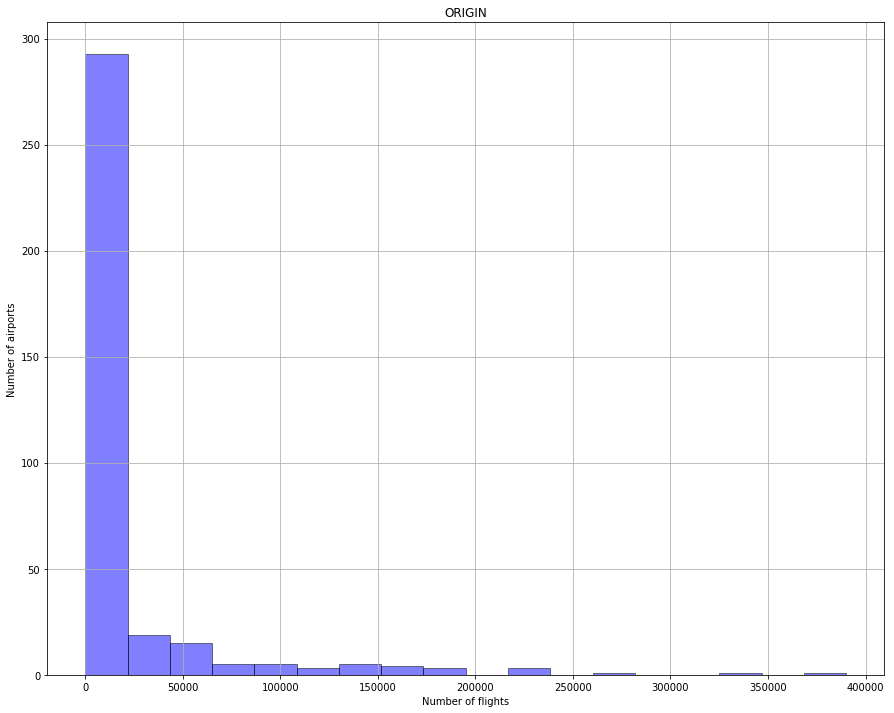

In [10]:
df = pd.DataFrame(df)
k = math.ceil(np.sqrt(len(df)))
#alternatively
#k = math.ceil((mx-mn)/20000)
df.hist(bins=np.linspace(mn, mx, k), 
                        color='blue', edgecolor='black', 
                        alpha=0.5, figsize=(15, 12))
plt.xlabel('Number of flights')
plt.ylabel('Number of airports')

## Question 4


We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.


## ANSWER 4 :

* Στην περίπτωση που κάποια τιμή του πεδίου ARR_DELAY είναι μεγαλύτερη του 15 σημαίνει ότι η πτήση έχει καθυστέρησει να φθάσει

* Στην περίπτωση που κάποια τιμή του πεδίου DEP_DELAY είναι μεγαλύτερη του 0 σημαίνει ότι η πτήση έχει καθυστέρησει να αναχωρήσει

* Στην περίπτωση όπου το πεδίο CANCELLED είναι θετικό και μεγαλύτερο του μηδέν τότε η πτήση έχει ακυρωθεί, οπότε την θεωρούμε σαν καθυστερημένη ως προς την αναχώρησή της

* Στην περίπτωση που κάποια τιμή του DEP_DELAY είναι NaN θεωρούμε ότι και πάλι η πτήση έχει καθυστέρηση

Με βάση αυτά τα κριτήρια φιλτράρουμε μόνο τις πτήσεις με καθυστέρηση άφιξης και αναχώρησης. Και υπολογίζουμε πόσες πτήσεις είχαν καθυστέρηση ανά μήνα.

In [11]:
delayed_data=data.loc[(data.DEP_DELAY>0) | (data.ARR_DELAY>15)  | (data['CANCELLED']>0) | (data['DEP_DELAY'].isna())]
delay_gr = delayed_data.groupby(delayed_data['FL_DATE'].dt.month)['FL_DATE'].count()
all_gr = data.groupby(data['FL_DATE'].dt.month)['FL_DATE'].count()

1η λύση: σχεδιάζουμε ένα scatterplot όπου δείχνουμε πόσες πτήσεις είχαν καθυστέρηση από τις συνολικές κατά κάθε μήνα του χρόνου.

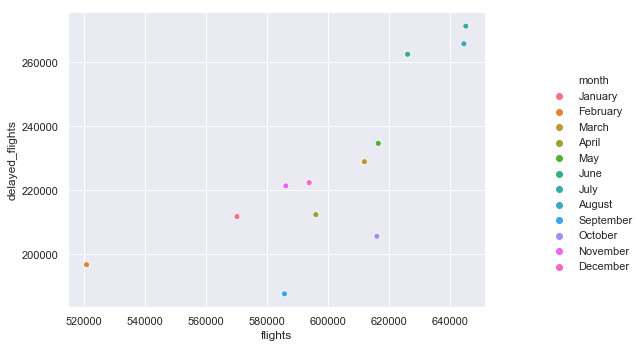

In [12]:
t_all_gr = pd.DataFrame({'month':all_gr.index, 'flights':all_gr.values})
t_delay_gr = pd.DataFrame({'month':delay_gr.index, 'delayed_flights':delay_gr.values})
gr_merged = t_all_gr.merge( t_delay_gr, how = 'left', on = 'month')
gr_merged['month']=pd.to_datetime(gr_merged['month'],format="%m").dt.strftime('%B')
gr_merged
#scatterplot
sns.set(style="darkgrid")
ax = sns.relplot(x="flights", y="delayed_flights",hue="month", data=gr_merged)
ax.fig.set_size_inches(10,5)

2η λύση: σχεδιάζουμε ένα linegraph όπου δείχνουμε το ποσοστό των καθυστερημένων πτήσεων ανά μήνα.

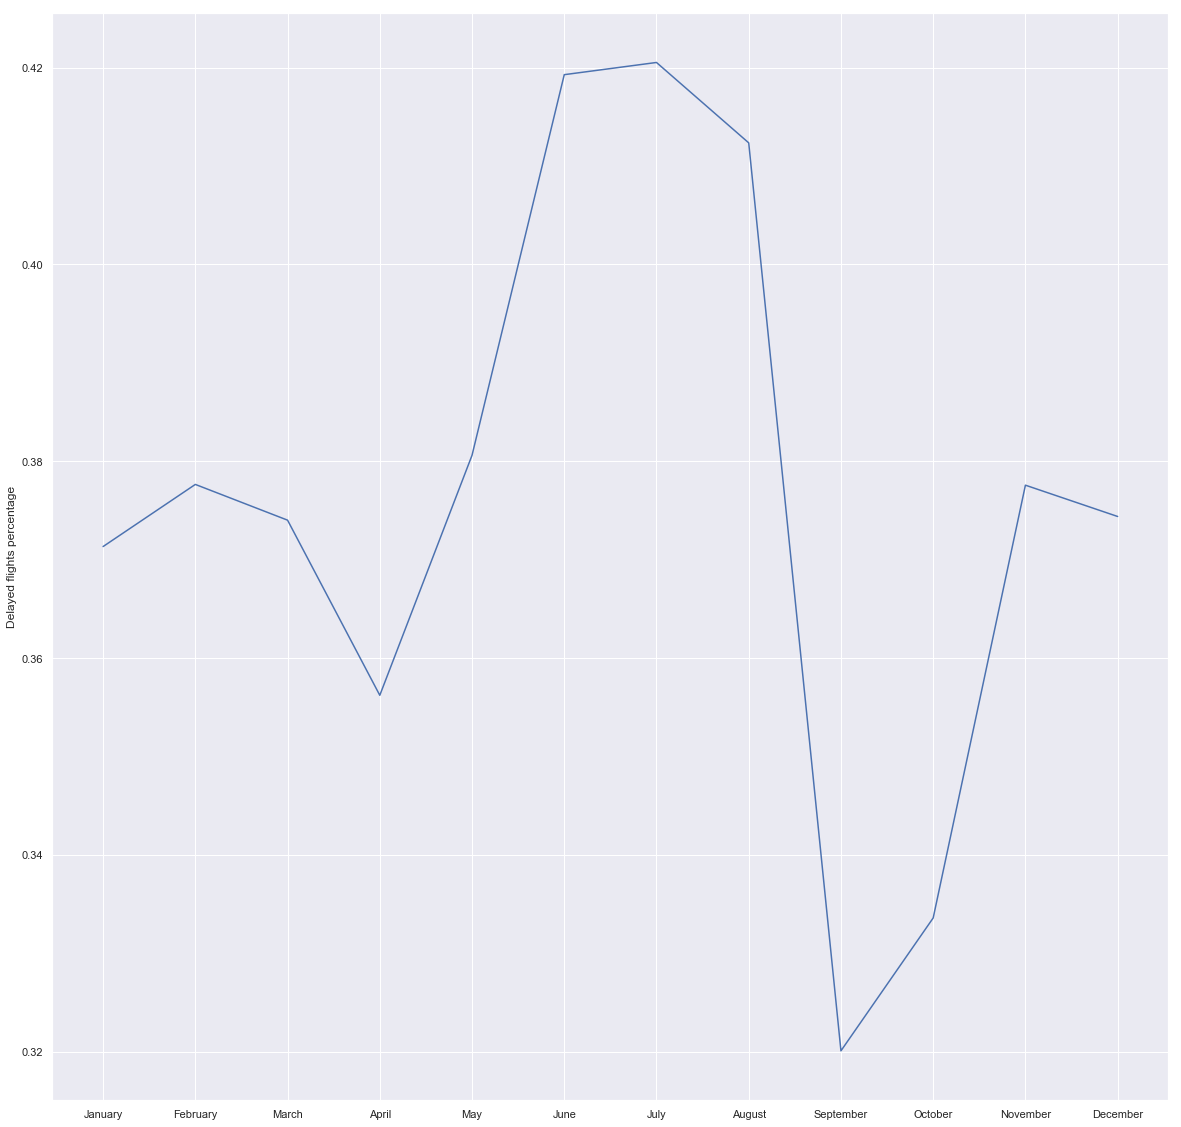

In [13]:
#linegraph
fligts_percentage = gr_merged['delayed_flights']/gr_merged['flights']
x = gr_merged['month']
plt.figure(figsize=(20, 20))
plt.plot(x, fligts_percentage)
plt.ylabel('Delayed flights percentage')
plt.show()

3η λύση: σχεδιάζουμε ένα bar όπου δείχνουμε ανά μήνα πόσες πτήσεις πραγματοποιήθηκαν και πόσες είχαν καθυστέρηση.

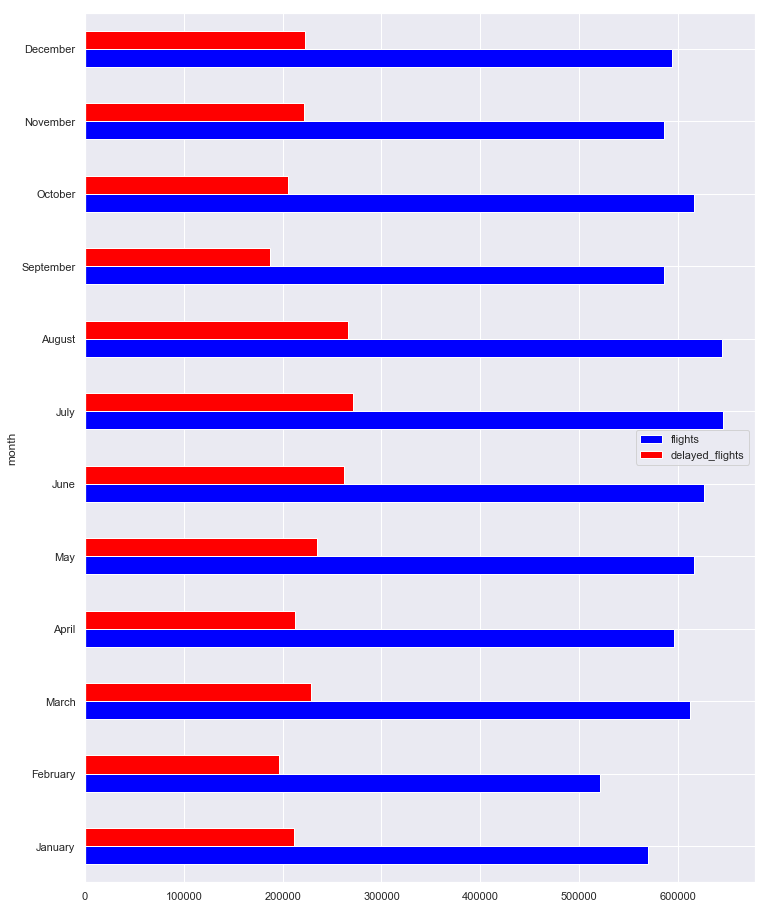

In [14]:
#barplot
df2 = gr_merged.set_index(['month'])
ax = df2.plot(kind='barh', color=('blue', 'red'), figsize=(12, 16))

## Question 5

Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.



## ANSWER 5 :

Αρχικά, παρέχουμε έναν πίνακα, ο οποίος δείχνει για κάθε πιθανή πτήση με διαφορετικό προορισμό και διαφορετικό αεροδρόμιο αναχώρησης ποια εταιρία έχει την καλύτερη απόδοση που κρίνεται με βάση την mean  τιμή ως προς το πεδίο DEP_DELAY.

In [15]:
grouped=(data_merged.groupby(['Description','CARRIER','ORIGIN','DEST'])['DEP_DELAY'].agg([('mean_dep_delay','mean')])
         .reset_index())
grouped

,Description,CARRIER,ORIGIN,DEST,mean_dep_delay
0,Alaska Airlines Inc.,AS,ABQ,SEA,3.191057
1,Alaska Airlines Inc.,AS,ADK,ANC,3.851485
2,Alaska Airlines Inc.,AS,ADQ,ANC,-2.838188
3,Alaska Airlines Inc.,AS,AKN,ANC,1.682540
4,Alaska Airlines Inc.,AS,ANC,ADK,-2.186275
5,Alaska Airlines Inc.,AS,ANC,ADQ,-2.172800
6,Alaska Airlines Inc.,AS,ANC,AKN,-3.761905
7,Alaska Airlines Inc.,AS,ANC,BET,-3.880982
8,Alaska Airlines Inc.,AS,ANC,CDV,-0.889197
9,Alaska Airlines Inc.,AS,ANC,DLG,-2.500000


Τέλος, για κάθε πιθανή πτήση με διαφορετικό προορισμό και διαφορετικό αεροδρόμιο αναχώρησης υπολογίζεται η  εταιρία με της καλύτερη απόδοση από όλες. Μάζι με αυτή την λύση δίνεται και μία μέθοδος για να βρίσκει την εταιρία με την καλύτερη απόδοση δεδομένου ενός αεροδρομίου αναχώρησης και άφιξης.

In [16]:
def find_best_airline(orig,dest):
    flt = grouped.loc[(grouped['ORIGIN']==orig) & (grouped['DEST']==dest)]
    mx = flt.loc[flt['mean_dep_delay']==flt['mean_dep_delay'].max()]
    print(mx)
    return mx
#find_best_airline('ABQ','SEA')
filt = (grouped.groupby(['ORIGIN','DEST'])['mean_dep_delay','Description','CARRIER'].max()).reset_index()
filt

,ORIGIN,DEST,mean_dep_delay,Description,CARRIER
0,ABE,ATL,11.991379,ExpressJet Airlines LLC,EV
1,ABE,CLT,5.063527,PSA Airlines Inc.,OH
2,ABE,DTW,15.946507,SkyWest Airlines Inc.,OO
3,ABE,FLL,40.708333,Allegiant Air,G4
4,ABE,MDT,175.000000,SkyWest Airlines Inc.,OO
5,ABE,MYR,7.892857,Allegiant Air,G4
6,ABE,ORD,13.338164,SkyWest Airlines Inc.,OO
7,ABE,PGD,16.277778,Allegiant Air,G4
8,ABE,PHL,9.292683,PSA Airlines Inc.,OH
9,ABE,PIE,13.050633,Allegiant Air,G4


## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions. The Jupyter notebook must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results. In your notebook you will read the data by assuming they reside in the same directory as your code. Your submission will *not* include the data.

The documentation must be at the level where somebody that has some Pandas and Python knowledge can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.